In [1]:
path = "data/section_one/s1/shelley_frankenstein.txt"
with open(path, "r") as fin:
    frankenstein = fin.read()

In [2]:
print(frankenstein[:364])

Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings. I arrived here yesterday, and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking.


In [3]:
frankenstein[:364]

'Letter 1\n\n_To Mrs. Saville, England._\n\n\nSt. Petersburgh, Dec. 11th, 17—.\n\n\nYou will rejoice to hear that no disaster has accompanied the\ncommencement of an enterprise which you have regarded with such evil\nforebodings. I arrived here yesterday, and my first task is to assure\nmy dear sister of my welfare and increasing confidence in the success\nof my undertaking.'

In [4]:
len(frankenstein)

418917

In [8]:
doc = frankenstein.split()
len(set(doc))

11590

In [9]:
# Tokens
len(set(frankenstein))

83

In [10]:
set(frankenstein)

{'\n',
 ' ',
 '!',
 '(',
 ')',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'Y',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'æ',
 'è',
 'é',
 'ê',
 'ô',
 '—',
 '‘',
 '’',
 '“',
 '”'}

In [12]:
from collections import Counter

In [15]:
characters = Counter(frankenstein)
characters.most_common(5)

[(' ', 68672), ('e', 43982), ('t', 28282), ('a', 25362), ('o', 23768)]

In [16]:
doc[:3]

['Letter', '1', '_To']

In [17]:
words = Counter(doc)
words.most_common(5)

[('the', 3897), ('and', 2903), ('I', 2719), ('of', 2634), ('to', 2072)]

In [21]:
to_count = ("imagination", "monster", "letter", "Letter")
for token in to_count:
    print(f"{token:<12} {words[token]}")

imagination  14
monster      21
letter       17
Letter       4


In [25]:
for token in words:
    if "letter" in token or "Letter" in token:
        print(f"{token:<12} {words[token]}")

Letter       4
letter,      4
letters      12
letter       17
letter.      2
letters,     3
letters;     1
letter:      1
letters.     1


In [26]:
import re
from collections import Counter

In [27]:
def count_tokens(doc: str):
    """Count tokens in a document."""
    doc = doc.split()
    counts = Counter(doc)

    return counts

count_tokens("this is a sentence. this is also a sentence")

Counter({'this': 2, 'is': 2, 'a': 2, 'sentence.': 1, 'also': 1, 'sentence': 1})

In [29]:
counts = count_tokens(frankenstein)
print(len(counts))

11590


In [31]:
lowercase = frankenstein.lower()
counts = count_tokens(lowercase)
print(len(counts))

11219


In [32]:
s = "I'm a self-taught programmer."

In [35]:
re.sub(r"[^\w\s]", "", s)

'Im a selftaught programmer'

In [36]:
import nltk

In [41]:
nltk.word_tokenize("That's another tokenization method.")

['That', "'s", 'another', 'tokenization', 'method', '.']

In [39]:
cleaned = re.sub(r"-", " ", s)
cleaned = re.sub(r"[^\w\s]", "", cleaned)
cleaned

'Im a self taught programmer'

In [40]:
to_remove = {r"-": " ", r"[^\w\s]": ""}
cleaned = s
for pattern, replacement in to_remove.items():
    cleaned = re.sub(pattern, replacement, cleaned)

In [ ]:
re.sub(r"\d{1,4}", "", frankenstein)

In [45]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import collocations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# nltk.download("wordnet")

In [44]:
# Install from base conda/mamba environment
# python -m ipykernel install --user --name=nlp_workshop

True

In [47]:
"This is some language.".split()

['This', 'is', 'some', 'language.']

In [49]:
def tokenize_text(doc):
    """Clean punctuation, digits, and similar cruft from a document
    and then tokenize it on white spaces.
    """
    doc = re.sub(r"-", " ", doc)
    doc = re.sub(r"[^\w\s]", "", doc)
    doc = re.sub(r"_", "", doc)
    doc = re.sub(r"[0-9]", "", doc)
    doc = re.sub(r"\s+", " ", doc)
    doc = doc.strip()
    doc = doc.lower()
    tokens = doc.split()

    return tokens

In [52]:
tokenized = tokenize_text(frankenstein)
counts = Counter(tokenized)
counts.most_common(25)

[('the', 4188),
 ('and', 2970),
 ('i', 2842),
 ('of', 2640),
 ('to', 2092),
 ('my', 1773),
 ('a', 1384),
 ('in', 1128),
 ('was', 1021),
 ('that', 1014),
 ('me', 864),
 ('had', 686),
 ('but', 685),
 ('with', 666),
 ('he', 604),
 ('you', 572),
 ('which', 558),
 ('it', 546),
 ('his', 533),
 ('as', 526),
 ('not', 508),
 ('for', 496),
 ('by', 460),
 ('on', 460),
 ('this', 401)]

In [54]:
def plot_counts(counts, n_words = 200, by_x = 10):
    """Plot word counts."""
    counts = pd.DataFrame(counts.items(), columns = ("word", "count"))
    counts.sort_values("count", ascending = False, inplace = True)

    fig, ax = plt.subplots(figsize = (9, 6))
    g = sns.lineplot(
        data = counts[:n_words], x = "word", y = "count", ax = ax
    )
    g.set(xlabel = "Words", ylabel = "Counts")
    plt.xticks(rotation = 90, ticks = range(0, n_words, by_x));

In [55]:
counts["the"]

4188

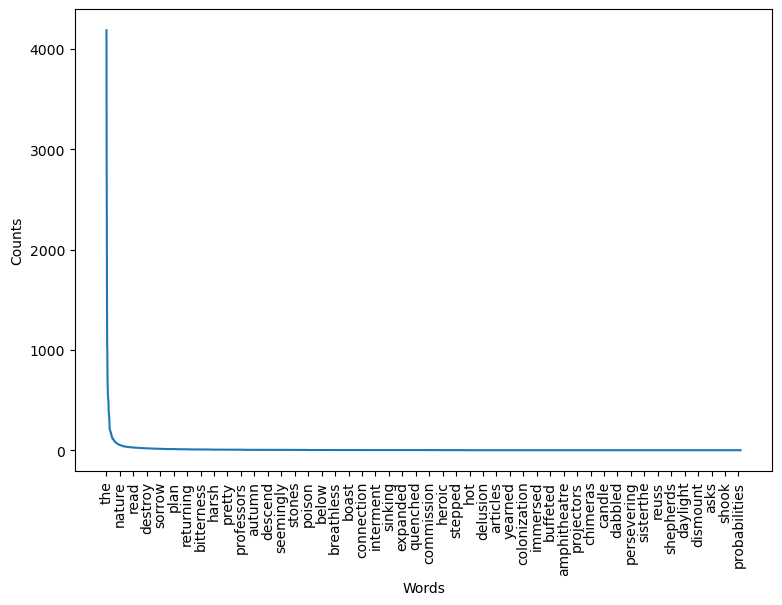

In [56]:
plot_counts(counts, len(counts), by_x = 150)

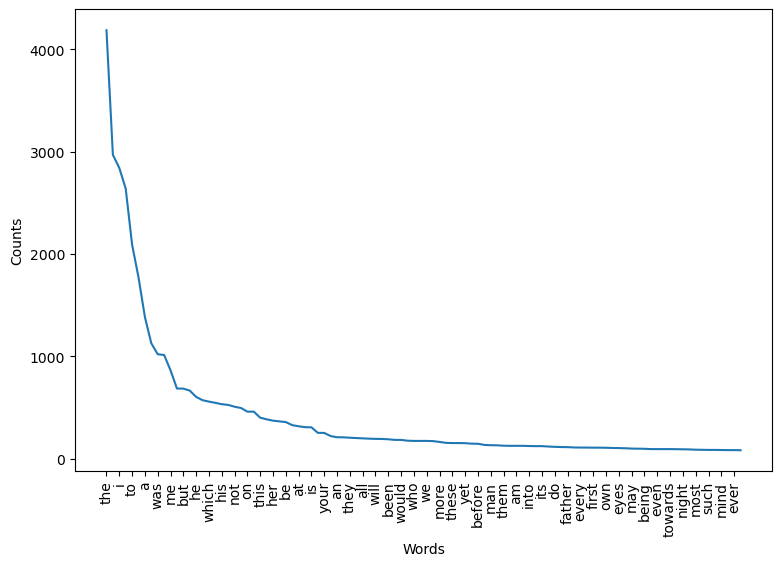

In [58]:
plot_counts(counts, 100, 2)

In [59]:
top50 = sum(count for word, count in counts.most_common(50))
total = counts.total()

In [60]:
top50 / total

0.4765984092513889

In [64]:
stoplist = "data/voyant_stoplist.txt"
with open(stoplist, "r") as fin:
    stopwords = fin.read().split("\n")

stopwords[:25]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any']

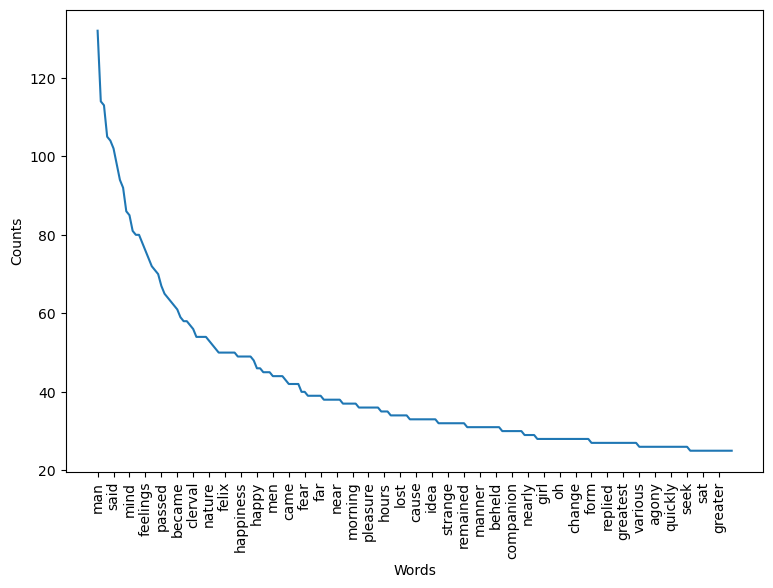

In [65]:
stopped = [token for token in tokenized if token not in stopwords]
stopped_counts = Counter(stopped)
plot_counts(stopped_counts, 200, 5)

In [74]:
least_freq = list(stopped_counts.keys())[-10:]
for tok in least_freq:
    print(tok, stopped_counts[tok])

didst 1
hadst 1
wouldst 1
rankle 1
triumphantly 1
exult 1
torturing 1
conflagration 1
fade 1
thinks 1


In [69]:
stopped_counts.total()

30608

In [70]:
len(stopped_counts)

6817

In [75]:
example = """The strong coffee, which I had after lunch, was $4.
It kept me going the rest of the day.
"""
ex_tokens = nltk.word_tokenize(example)
for token in ex_tokens:
    print(token)

The
strong
coffee
,
which
I
had
after
lunch
,
was
$
4
.
It
kept
me
going
the
rest
of
the
day
.


In [78]:
tagged = nltk.pos_tag(ex_tokens)
# Penn treebank tags
for pair in tagged:
    print(pair)

('The', 'DT')
('strong', 'JJ')
('coffee', 'NN')
(',', ',')
('which', 'WDT')
('I', 'PRP')
('had', 'VBD')
('after', 'IN')
('lunch', 'NN')
(',', ',')
('was', 'VBD')
('$', '$')
('4', 'CD')
('.', '.')
('It', 'PRP')
('kept', 'VBD')
('me', 'PRP')
('going', 'VBG')
('the', 'DT')
('rest', 'NN')
('of', 'IN')
('the', 'DT')
('day', 'NN')
('.', '.')


In [77]:
lemmatizer = WordNetLemmatizer()

In [84]:
lemmatizer.lemmatize("kept", pos = wordnet.VERB)

'keep'

In [80]:
wordnet = nltk.corpus.wordnet

def convert_tag(tag):
    """Convert Penn treebank tags to Wordnet tags."""
    if tag.startswith("J"):
        tag = wordnet.ADJ
    elif tag.startswith("V"):
        tag = wordnet.VERB
    elif tag.startswith("N"):
        tag = wordnet.NOUN
    elif tag.startswith("R"):
        tag = wordnet.ADV
    else:
        tag = ""

    return tag

In [87]:
for (token, tag) in tagged:
    tag = convert_tag(tag)
    if tag:      
        lemma = lemmatizer.lemmatize(token, pos = tag)
    else:
        lemma = lemmatizer.lemmatize(token)
    print(f"Token: {token} => Lemma: {lemma}")

Token: The => Lemma: The
Token: strong => Lemma: strong
Token: coffee => Lemma: coffee
Token: , => Lemma: ,
Token: which => Lemma: which
Token: I => Lemma: I
Token: had => Lemma: have
Token: after => Lemma: after
Token: lunch => Lemma: lunch
Token: , => Lemma: ,
Token: was => Lemma: be
Token: $ => Lemma: $
Token: 4 => Lemma: 4
Token: . => Lemma: .
Token: It => Lemma: It
Token: kept => Lemma: keep
Token: me => Lemma: me
Token: going => Lemma: go
Token: the => Lemma: the
Token: rest => Lemma: rest
Token: of => Lemma: of
Token: the => Lemma: the
Token: day => Lemma: day
Token: . => Lemma: .


In [88]:
stemmer = PorterStemmer()

In [90]:
matrix = ["complicated", "complicity"]
for token in matrix:
    stem = stemmer.stem(token)
    print(token, stem)

complicated complic
complicity complic


In [91]:
finder = collocations.BigramCollocationFinder.from_words(stopped)

In [92]:
bigrams = finder.ngram_fd
bigrams = [(word, pair, count) for (word, pair), count in bigrams.items()]
bigrams = pd.DataFrame(bigrams, columns = ("word", "pair", "count"))
bigrams.sort_values("count", ascending = False, inplace = True)

In [93]:
bigrams.head(10)

,word,pair,count
832,old,man,32
629,native,country,15
3353,natural,philosophy,14
7036,taken,place,13
22419,mr,kirwin,12
5932,fellow,creatures,12
3417,dear,victor,10
7647,young,man,9
2650,long,time,9
6819,short,time,9


In [94]:
# Pointwise mutual information
measures = collocations.BigramAssocMeasures()
pmi = finder.score_ngrams(measures.pmi)
pmi = [(word, pair, val) for (word, pair), val in pmi]
pmi = pd.DataFrame(pmi, columns = ("word", "pair", "pmi"))
pmi.sort_values("pmi", ascending = False, inplace = True)

In [95]:
pmi.head(10)

,word,pair,pmi
0,achieve,treading,14.901621
273,partially,unveiled,14.901621
283,petty,experimentalist,14.901621
282,petticoat,linen,14.901621
281,persevering,prudent,14.901621
280,pearly,whiteness,14.901621
279,peak,andes,14.901621
278,peaceable,lawgivers,14.901621
277,paying,insurance,14.901621
276,pauses,nightly,14.901621


In [96]:
pmi.tail(10)

,word,pair,pmi
29178,said,father,1.409017
29179,man,saw,1.302638
29180,saw,man,1.302638
29181,father,father,1.261263
29182,life,father,1.248552
29183,said,man,1.184802
29184,man,eyes,1.156787
29185,man,shall,1.142982
29186,shall,man,1.142982
29187,man,father,1.037048


In [97]:
idx = None
for i, token in enumerate(tokenized):
    if token == "persevering":
        idx = i

In [98]:
idx

2740